# Linear regression on the body data set
Math 395 Learning from Large Data Sets 

Fall 2024, Hope College

In [1]:
import numpy as np
from scipy import linalg as LA
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## load the data set

In [2]:
import pandas as pd
df = pd.read_table('bodydata.txt', header = None, sep='\s+')
# df.rename(columns={21:"age", 22:"weight", 23:"height", 24:"sex"})
df

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,42.9,26.0,31.5,17.7,28.0,13.1,10.4,18.8,14.1,106.2,...,32.5,26.0,34.5,36.5,23.5,16.5,21.0,65.6,174.0,1
1,43.7,28.5,33.5,16.9,30.8,14.0,11.8,20.6,15.1,110.5,...,34.4,28.0,36.5,37.5,24.5,17.0,23.0,71.8,175.3,1
2,40.1,28.2,33.3,20.9,31.7,13.9,10.9,19.7,14.1,115.1,...,33.4,28.8,37.0,37.3,21.9,16.9,28.0,80.7,193.5,1
3,44.3,29.9,34.0,18.4,28.2,13.9,11.2,20.9,15.0,104.5,...,31.0,26.2,37.0,34.8,23.0,16.6,23.0,72.6,186.5,1
4,42.5,29.9,34.0,21.5,29.4,15.2,11.6,20.7,14.9,107.5,...,32.0,28.4,37.7,38.6,24.4,18.0,22.0,78.8,187.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,38.0,30.4,32.9,17.0,27.1,12.9,10.4,19.5,14.4,108.4,...,30.3,25.4,37.7,37.9,22.4,15.4,29.0,71.8,176.5,0
503,35.3,28.7,30.4,17.7,25.6,12.4,9.8,17.3,13.6,99.3,...,30.1,23.6,35.6,33.3,22.4,15.2,21.0,55.5,164.4,0
504,34.7,24.9,24.7,17.3,24.2,12.0,10.2,18.0,13.6,91.9,...,27.4,24.0,34.4,34.1,21.2,15.5,33.0,48.6,160.7,0
505,38.5,29.0,32.9,15.3,25.6,12.0,9.8,18.6,13.3,107.1,...,30.6,24.9,38.4,36.6,22.0,15.5,33.0,66.4,174.0,0


## visualize a few variables individually

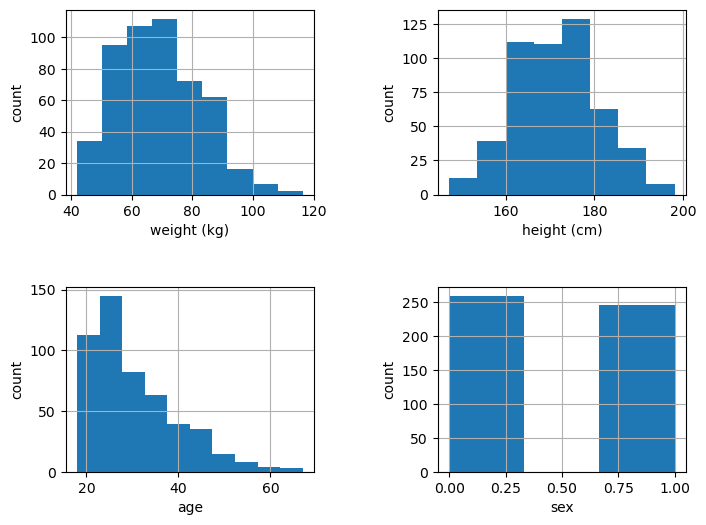

In [3]:
age = df[[21]]
weight = df[[22]]
height = df[[23]]
sex = df[[24]]

fig, axs = plt.subplots(2, 2, figsize=(8, 6))

fig.subplots_adjust(wspace=.5, hspace=.5)

plt.subplot(2,2,1)
df[22].hist(bins=9)
plt.xlabel('weight (kg)');
plt.ylabel('count');
#plt.title('weight (kg)')

plt.subplot(2,2,2)
df[23].hist(bins=8)
plt.xlabel('height (cm)');
plt.ylabel('count');
#plt.title('height (cm)')

plt.subplot(2,2,3)
df[21].hist(bins=10)
plt.xlabel('age');
plt.ylabel('count');
#plt.title('age')

plt.subplot(2,2,4)
df[24].hist(bins=3)
plt.xlabel('sex');
plt.ylabel('count');
#plt.title('sex')

## make scatterplots between the response and some predictors

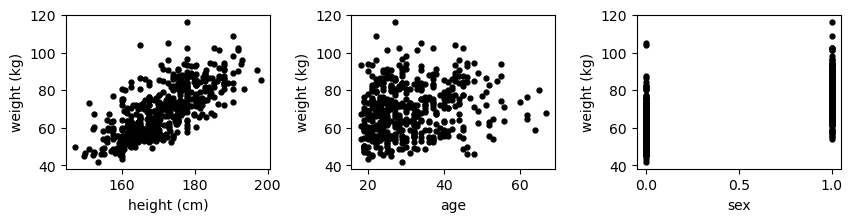

In [4]:
fig, axs = plt.subplots(1, 3, figsize=(10, 2))

fig.subplots_adjust(wspace=.4)

plt.subplot(1,3,1)
plt.plot(height,weight,color='black', linestyle='', marker='.', markersize=7)
plt.xlabel('height (cm)');
plt.ylabel('weight (kg)');

plt.subplot(1,3,2)
plt.plot(age,weight,color='black', linestyle='', marker='.', markersize=7)
plt.xlabel('age');
plt.ylabel('weight (kg)');

plt.subplot(1,3,3)
plt.plot(sex,weight,color='black', linestyle='', marker='.', markersize=7)
plt.xlabel('sex');
plt.ylabel('weight (kg)');


## Simple linear regression (weight ~ height)

In [5]:
x = height
y = weight

n = y.shape[0] # number of people
SST = np.sum((y-np.sum(y)/n)**2)

LRmodel = LinearRegression().fit(x, y)  # fit a linear reg model with intercept

beta0 = LRmodel.intercept_    # beta_0
beta1 = LRmodel.coef_         # beta_1

print(beta0,beta1)
      
LRmodel.predict([[195]]) # make a prediction for a person at height 195

[-105.01125417] [[1.01761678]]


/opt/homebrew/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


array([[93.42401709]])

training MSE = 86.29784174816433
RMSE_train = 9.289663166561224
R^2 = 0.5145208375388493


/opt/homebrew/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


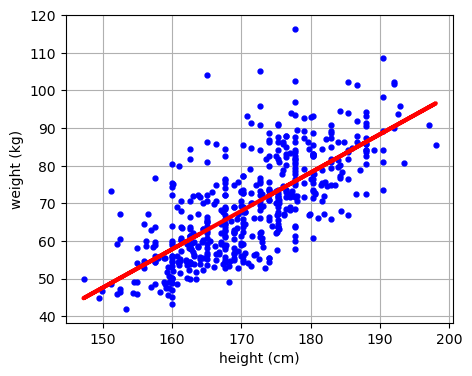

In [6]:
yhat = LRmodel.predict(x)     # fitted values

residuals = y - yhat

SSres = np.sum(residuals**2)

mse_train = SSres / n

rmse_train = np.sqrt(mse_train)

R_squared = 1 - SSres / SST

plt.figure(figsize=(5,4))
plt.plot(x,y,'b.', markersize=7)
plt.plot(x,yhat,'r-', linewidth=3)
plt.xlabel('height (cm)');
plt.ylabel('weight (kg)');
plt.grid('on')

print('training MSE =', mse_train.values[0])
print('RMSE_train =', rmse_train.values[0])
print('R^2 =', R_squared.values[0])

## Multiple linear regression (weight ~ height+sex)

/opt/homebrew/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


[[82.08068334]]
[-56.94948895] [[0.71297524 8.36599352]]
RMSE = 8.775456680860504 
R^2 = 0.5667783889889462


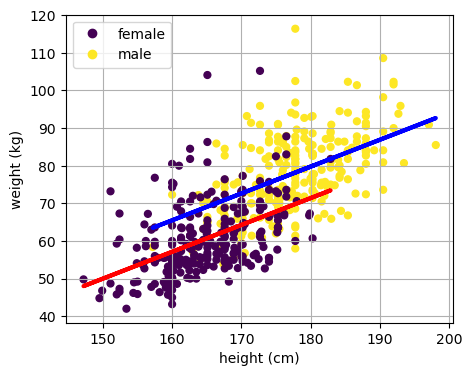

In [7]:
X = df[[23,24]] # height and sex

#df[25] = df[23] * df[24] # create a new column 
#X = df[[23,24,25]] # height, sex, and their product

LRmodel = LinearRegression().fit(X, y)  # fit a linear reg model with intercept

beta0 = LRmodel.intercept_    # beta_0
beta1 = LRmodel.coef_         # beta_1

print(LRmodel.predict([[195,0]])) # make prediction for the weight of a male at height 195cm

yhat = LRmodel.predict(X)     # fitted values

residuals = y - yhat

SSres = np.sum(residuals**2)

mse_train = SSres / n

rmse_train = np.sqrt(mse_train)

R_squared = 1 - SSres / SST

plt.figure(figsize=(5,4))
plt_handle = plt.scatter(x, y, 24, c = sex)
plt.legend(handles=plt_handle.legend_elements()[0], labels=['female','male'])
plt.plot(height[np.array(sex==0)],yhat[np.array(sex==0)],'r-', linewidth=3)
plt.plot(height[np.array(sex==1)],yhat[np.array(sex==1)],'b-', linewidth=3)
plt.xlabel('height (cm)');
plt.ylabel('weight (kg)');
plt.grid('on')

print(beta0,beta1)
print('RMSE =', rmse_train.values[0], '\nR^2 =', R_squared.values[0])

## check multicollinearity among all the features

In [8]:
X = df[df.columns.drop([22])]

X.corr()  # matrix of pairwise correlations (for identifying highly correlated pairs)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,23,24
0,1.000000,0.309036,0.486273,0.583258,0.769141,0.765821,0.722839,0.635962,0.661416,0.792596,...,0.121928,0.695062,0.752642,0.507907,0.510814,0.603468,0.771598,0.086084,0.748922,0.774948
1,0.309036,1.000000,0.673457,0.356785,0.331169,0.322857,0.279236,0.437788,0.368313,0.277239,...,0.414155,0.299107,0.289682,0.472469,0.407064,0.335818,0.263255,0.247878,0.381424,0.115645
2,0.486273,0.673457,1.000000,0.472556,0.524129,0.525758,0.468158,0.608302,0.495406,0.478764,...,0.531774,0.480146,0.478085,0.623355,0.592980,0.539063,0.479517,0.271144,0.485279,0.262415
3,0.583258,0.356785,0.472556,1.000000,0.665070,0.665238,0.608115,0.550289,0.597854,0.737612,...,0.357654,0.732898,0.717549,0.563652,0.553502,0.587343,0.680241,0.315405,0.552911,0.612886
4,0.769141,0.331169,0.524129,0.665070,1.000000,0.758868,0.730864,0.659065,0.668539,0.870648,...,0.314773,0.792334,0.807118,0.592872,0.596909,0.635021,0.760893,0.192888,0.626893,0.702901
5,0.765821,0.322857,0.525758,0.665238,0.758868,1.000000,0.839931,0.731504,0.821098,0.819470,...,0.206917,0.804784,0.858206,0.590979,0.579908,0.664162,0.845756,0.198590,0.738113,0.772980
6,0.722839,0.279236,0.468158,0.608115,0.730864,0.839931,1.000000,0.712484,0.772449,0.778399,...,0.194020,0.762159,0.814709,0.581874,0.581438,0.654694,0.862553,0.207080,0.677962,0.726855
7,0.635962,0.437788,0.608302,0.550289,0.659065,0.731504,0.712484,1.000000,0.723273,0.681802,...,0.431528,0.681405,0.720652,0.733818,0.686093,0.654707,0.731180,0.172336,0.588095,0.543926
8,0.661416,0.368313,0.495406,0.597854,0.668539,0.821098,0.772449,0.723273,1.000000,0.692111,...,0.192628,0.686289,0.735250,0.542354,0.543616,0.677230,0.762749,0.239044,0.686451,0.688949
9,0.792596,0.277239,0.478764,0.737612,0.870648,0.819470,0.778399,0.681802,0.692111,1.000000,...,0.323427,0.895188,0.894984,0.624783,0.627054,0.679757,0.840709,0.176838,0.665735,0.781142


In [9]:
np.linalg.cond(X.transpose()@X) # condition number 

2488653.5093488875

## standardize features

In [10]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler() 
X_norm = scaler.fit_transform(X)

np.linalg.cond(X_norm.transpose() @ X_norm)

394.9680002253774

## Multiple linear regression with all the features

In [11]:
LRmodel = LinearRegression().fit(X_norm, y)  # fit a linear reg model with intercept

beta0 = LRmodel.intercept_    # beta_0
beta1 = LRmodel.coef_         # beta_1

yhat = LRmodel.predict(X_norm)     # fitted values

residuals = y - yhat

SSres = np.sum(residuals**2)

mse_train = SSres / n

rmse_train = np.sqrt(mse_train)

R_squared = 1 - SSres / np.sum((y-np.sum(y)/n)**2)

print(beta0,beta1)
print('RMSE =', rmse_train.values[0], '\nR^2 =', R_squared.values[0])

[69.14753452] [[-0.08238321  0.24657563 -0.17285321  0.74009019  0.42291442  0.3059371
   0.18621913  0.58271323  0.13480724  0.80882062  1.25899539  4.10636266
  -0.07874585  1.57180817  1.00986856  0.481938    1.32918507  0.53693768
   1.00661741  0.02181355 -0.33482977 -0.53803978  2.81990078 -0.75419823]]
RMSE = 2.04522269541196 
R^2 = 0.976468377846796


/opt/homebrew/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


### plot fitted values against true responses

RMSE = 2.04522269541196 
R^2 = 0.976468377846796


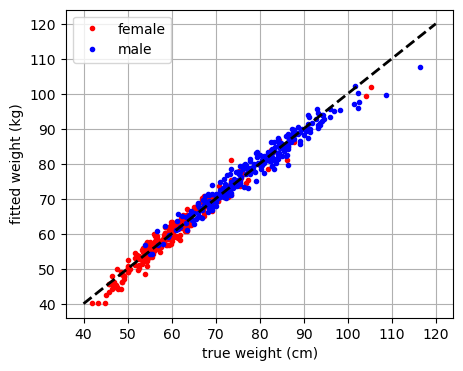

In [12]:
print('RMSE =', rmse_train.values[0], '\nR^2 =', R_squared.values[0])

plt.figure(figsize=(5,4))
plt.plot(y[np.array(sex==0)],yhat[np.array(sex==0)],'r.')
plt.plot(y[np.array(sex==1)],yhat[np.array(sex==1)],'b.')
plt.legend(['female','male'])
plt.plot([40, 120], [40, 120], color='k', linestyle='--', linewidth=2)
plt.xlabel('true weight (cm)');
plt.ylabel('fitted weight (kg)');
plt.grid('on')

### Plot residuals against fitted values

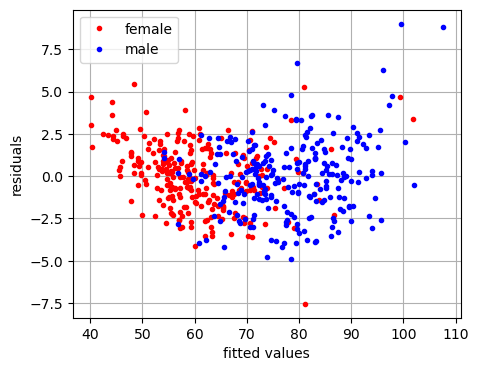

In [13]:
residuals = y - yhat
plt.figure(figsize=(5,4))
plt.plot(yhat[np.array(sex==0)], residuals[np.array(sex==0)],'r.')
plt.plot(yhat[np.array(sex==1)], residuals[np.array(sex==1)],'b.')
plt.legend(['female','male'])
plt.xlabel('fitted values');
plt.ylabel('residuals');
plt.grid('on')

## polynomial regression

In [14]:
from sklearn.preprocessing import PolynomialFeatures
 
X_poly = PolynomialFeatures(degree=2).fit_transform(X_norm)

polyModel= LinearRegression().fit(X_poly, y)

beta0 = polyModel.intercept_    # beta_0
beta1 = polyModel.coef_         # beta_1

yhat = polyModel.predict(X_poly)     # fitted values

residuals = y - yhat

SSres = np.sum(residuals**2)

mse_train = SSres / n

rmse_train = np.sqrt(mse_train)

R_squared = 1 - SSres / SST

#print(beta0,beta1)
print('RMSE =', rmse_train.values[0], '\nR^2 =', R_squared.values[0])

RMSE = 0.9882995048487211 
R^2 = 0.9945052515503253


/opt/homebrew/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


RMSE = 0.9882995048487211 
R^2 = 0.9945052515503253


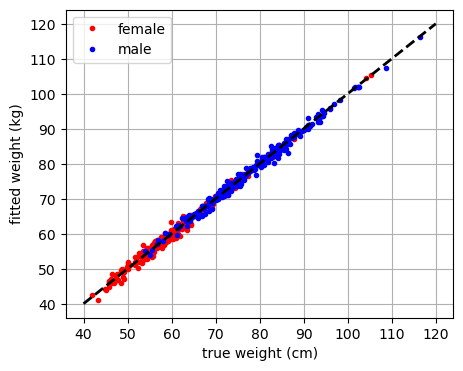

In [15]:
# fitted values vs true values
print('RMSE =', rmse_train.values[0], '\nR^2 =', R_squared.values[0])

plt.figure(figsize=(5,4))
plt.plot(y[np.array(sex==0)],yhat[np.array(sex==0)],'r.')
plt.plot(y[np.array(sex==1)],yhat[np.array(sex==1)],'b.')
plt.legend(['female','male'])
plt.plot([40, 120], [40, 120], color='k', linestyle='--', linewidth=2)
plt.xlabel('true weight (cm)');
plt.ylabel('fitted weight (kg)');
plt.grid('on')

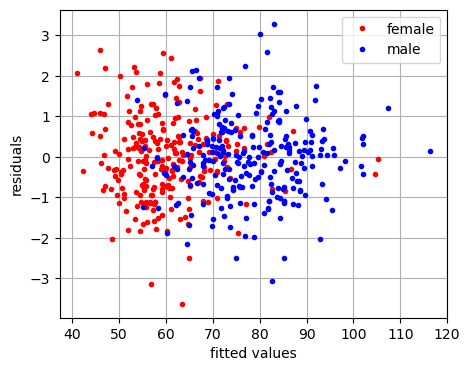

In [16]:
# residuals against fitted values

plt.figure(figsize=(5,4))
plt.plot(yhat[np.array(sex==0)], residuals[np.array(sex==0)],'r.')
plt.plot(yhat[np.array(sex==1)], residuals[np.array(sex==1)],'b.')
plt.legend(['female','male'])
plt.xlabel('fitted values');
plt.ylabel('residuals');
plt.grid('on')

## Ridge regression

In [17]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=100)
clf.fit(X, y)

clf.coef_

array([[-0.04806541,  0.12115795, -0.04580343,  0.25539249,  0.14955701,
         0.15947521,  0.12075526,  0.32504885,  0.08685959,  0.07944433,
         0.13929911,  0.34204673,  0.00896925,  0.24288195,  0.26097888,
         0.10963065,  0.32010096,  0.23056649,  0.35091039,  0.00924569,
        -0.05098274, -0.05553978,  0.2905953 , -0.18568318]])